# Analysis on Meds<>Labtest pairs of Top 60 Drugs (atleast 1000 subjects)
Run all cells or view results below.

## Import Libraries

In [ ]:
import pandas as pd
import datetime
import numpy as np
from scipy.stats import mannwhitneyu
from scipy import stats
from tqdm import tqdm
import os

## Load Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PARENT='/content/drive/MyDrive/TAU'
DATA = PARENT+'/Datasets/mimiciii/1.4'
RESULT = PARENT+'/Results'

In [ ]:
for i in os.walk(os.path.join(DATA)):
    print(i)

('/content/drive/MyDrive/TAU/Datasets/mimiciii/1.4', [], ['CALLOUT.csv.gz', 'ADMISSIONS.csv.gz', 'CAREGIVERS.csv.gz', 'D_ITEMS.csv.gz', 'D_ICD_PROCEDURES.csv.gz', 'D_ICD_DIAGNOSES.csv.gz', 'ICUSTAYS.csv.gz', 'CHARTEVENTS.csv.gz', 'DRGCODES.csv.gz', 'CPTEVENTS.csv.gz', 'DIAGNOSES_ICD.csv.gz', 'D_CPT.csv.gz', 'D_LABITEMS.csv.gz', 'DATETIMEEVENTS.csv.gz', 'INPUTEVENTS_CV.csv.gz', 'INPUTEVENTS_MV.csv.gz', 'LABEVENTS.csv.gz', 'MICROBIOLOGYEVENTS.csv.gz', 'OUTPUTEVENTS.csv.gz', 'PATIENTS.csv.gz', 'README.md', 'PROCEDURES_ICD.csv.gz', 'PRESCRIPTIONS.csv.gz', 'TRANSFERS.csv.gz', 'PROCEDUREEVENTS_MV.csv.gz', 'SERVICES.csv.gz', 'LICENSE.txt', 'NOTEEVENTS.csv.gz', 'SHA256SUMS.txt', 'index.html'])


## Analysis - Top 60 Meds - atleast 100 events

### Load Results

In [ ]:
results = pd.read_csv(os.path.join(RESULT, 'Final_res_with_selection.csv'))

In [ ]:
results = results.drop(columns=['Unnamed: 0'])

In [ ]:
results

,Medication,Lab Test,Ttest-pvalue,Estimated (mean),Estimated (std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Number of patients
0,Dextrose 5%,"Calcium, Total",0.623062,7.833035,1.348189,7.806308,0.739587,4119.951289,5653.278847,6377
1,Dextrose 5%,Chloride,0.239468,108.472083,13.440038,107.600239,9.450144,4519.163802,5963.001996,3660
2,Dextrose 5%,Creatinine,0.179051,2.502950,3.356789,2.708780,2.328687,4087.627951,5054.102963,7686
3,Dextrose 5%,Phosphate,0.056293,3.536708,2.803136,3.802750,1.938160,4985.209744,6205.658178,3854
4,Dextrose 5%,Asparate Aminotransferase (AST),0.137399,322.281036,1102.504233,462.868500,1060.103172,4723.115504,5723.705106,1976
...,...,...,...,...,...,...,...,...,...,...
1160,Ceftriaxone,pO2,0.330551,830.881757,6223.317605,124.620982,48.522098,3429.415014,4372.152806,1267
1161,Labetalol,Glucose,0.160730,145.827407,98.292075,158.902914,51.132912,4232.389886,5228.884798,1631
1162,Labetalol,Hematocrit,0.000559,28.931015,5.427553,31.042798,4.503288,4485.833859,6007.441176,1876
1163,Labetalol,Hemoglobin,0.000173,9.755980,2.001523,10.581540,1.574583,4569.295571,6120.806872,1739


### Significance Test - 0.05 P value threshold

In [ ]:
results[results['Ttest-pvalue']>0.05]

,Medication,Lab Test,Ttest-pvalue,Estimated (mean),Estimated (std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Number of patients
0,Dextrose 5%,"Calcium, Total",0.623062,7.833035,1.348189,7.806308,0.739587,4119.951289,5653.278847,6377
1,Dextrose 5%,Chloride,0.239468,108.472083,13.440038,107.600239,9.450144,4519.163802,5963.001996,3660
2,Dextrose 5%,Creatinine,0.179051,2.502950,3.356789,2.708780,2.328687,4087.627951,5054.102963,7686
3,Dextrose 5%,Phosphate,0.056293,3.536708,2.803136,3.802750,1.938160,4985.209744,6205.658178,3854
4,Dextrose 5%,Asparate Aminotransferase (AST),0.137399,322.281036,1102.504233,462.868500,1060.103172,4723.115504,5723.705106,1976
...,...,...,...,...,...,...,...,...,...,...
1156,Ceftriaxone,White Blood Cells,0.582439,16.336998,10.696597,17.114027,11.686848,3599.454250,4078.113801,1447
1157,Ceftriaxone,PTT,0.833283,58.379275,37.339270,57.286447,22.035237,4168.830010,4374.126786,1230
1158,Ceftriaxone,Platelet Count,0.829200,144.500065,176.013415,149.458807,156.073761,3483.025561,4457.510008,1461
1160,Ceftriaxone,pO2,0.330551,830.881757,6223.317605,124.620982,48.522098,3429.415014,4372.152806,1267


In [ ]:
significant = results[results['Ttest-pvalue']<=0.05]

### Plots and Analysis

In [ ]:
vals = significant.groupby('Medication').sum()['Number of patients']

In [ ]:
vals

Medication
ACD-A Citrate (1000ml)              2975
Acyclovir                           4383
Albumin 25%                        21758
Albumin 5%                         23147
Beneprotein                         4298
Calcium Gluconate                  49606
Cefazolin                          17036
Cefepime                           16828
Ceftriaxone                         8401
Ciprofloxacin                      20015
Citrate                             3011
D5 1/2NS                           16263
Dextrose 5%                        68531
Dilantin                            4091
Famotidine (Pepcid)                37176
Fentanyl                           45185
Fentanyl (Concentrate)             25648
Free Water                         19027
Fresh Frozen Plasma                17976
Furosemide (Lasix)                 51514
GT Flush                           46309
Gastric Meds                       54636
Haloperidol (Haldol)                6659
Heparin Sodium                     16609
Hepar

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = list(vals.keys())
y = list(vals)

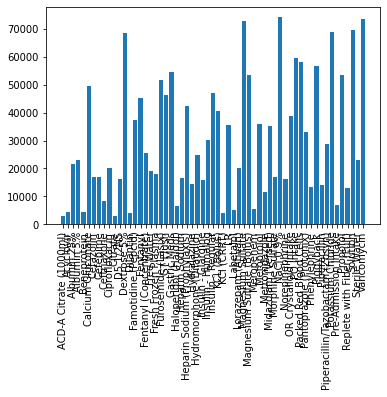

In [ ]:
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
res_analysis = results

### Bonferroni - Using package

In [ ]:
from statsmodels.stats.multitest import multipletests

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pvals = res_analysis['Ttest-pvalue']

In [ ]:
bonferroni_analysis = multipletests(pvals, alpha=0.05, method='bonferroni')

In [ ]:
bonferroni_analysis

(array([False, False, False, ..., False, False, False]),
 array([1.        , 1.        , 1.        , ..., 0.65156191, 0.20101145,
        0.06759018]),
 4.402760962973762e-05,
 4.291845493562232e-05)

In [ ]:
reject, pvals_corrected, _, alphacBonf = bonferroni_analysis

In [ ]:
pvals_corrected

array([1.        , 1.        , 1.        , ..., 0.65156191, 0.20101145,
       0.06759018])

In [ ]:
not_reject = [not i for i in reject]

In [ ]:
res_analysis[not_reject]

,Medication,Lab Test,Ttest-pvalue,Estimated (mean),Estimated (std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Number of patients
0,Dextrose 5%,"Calcium, Total",0.623062,7.833035,1.348189,7.806308,0.739587,4119.951289,5653.278847,6377
1,Dextrose 5%,Chloride,0.239468,108.472083,13.440038,107.600239,9.450144,4519.163802,5963.001996,3660
2,Dextrose 5%,Creatinine,0.179051,2.502950,3.356789,2.708780,2.328687,4087.627951,5054.102963,7686
3,Dextrose 5%,Phosphate,0.056293,3.536708,2.803136,3.802750,1.938160,4985.209744,6205.658178,3854
4,Dextrose 5%,Asparate Aminotransferase (AST),0.137399,322.281036,1102.504233,462.868500,1060.103172,4723.115504,5723.705106,1976
...,...,...,...,...,...,...,...,...,...,...
1160,Ceftriaxone,pO2,0.330551,830.881757,6223.317605,124.620982,48.522098,3429.415014,4372.152806,1267
1161,Labetalol,Glucose,0.160730,145.827407,98.292075,158.902914,51.132912,4232.389886,5228.884798,1631
1162,Labetalol,Hematocrit,0.000559,28.931015,5.427553,31.042798,4.503288,4485.833859,6007.441176,1876
1163,Labetalol,Hemoglobin,0.000173,9.755980,2.001523,10.581540,1.574583,4569.295571,6120.806872,1739


In [ ]:
res_analysis[reject]

,Medication,Lab Test,Ttest-pvalue,Estimated (mean),Estimated (std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Number of patients
6,Dextrose 5%,Glucose,1.679805e-05,128.964983,238.409478,153.352553,51.641875,3231.593434,4324.595813,15698
8,Dextrose 5%,Hematocrit,2.999705e-13,29.028669,6.774999,30.302037,3.877004,3146.537010,4215.091370,19941
17,Dextrose 5%,PT,4.912840e-06,14.795489,24.839223,18.794526,6.966404,3995.017762,5046.867330,6737
28,Dextrose 5%,pO2,4.602546e-17,103.926914,173.645272,169.468235,83.500183,3308.623848,5007.784210,5545
38,NaCl 0.9%,Glucose,1.809602e-09,130.023642,191.337333,158.806057,67.742378,2846.685105,4065.154791,16739
...,...,...,...,...,...,...,...,...,...,...
1145,Beneprotein,Hematocrit,1.133121e-05,26.606541,3.392691,28.820583,2.973895,11132.065866,8983.843077,1512
1146,Beneprotein,Hemoglobin,1.226986e-05,8.911611,1.275544,9.728198,1.095396,11535.684325,9667.184782,1420
1147,Beneprotein,Red Blood Cells,8.458762e-06,2.960255,0.433525,3.249839,0.392569,11153.729103,9307.899049,1366
1152,Ceftriaxone,Hematocrit,6.385197e-06,28.406065,4.753860,30.125306,3.672727,3370.899297,4060.520550,3551


In [ ]:
significant = res_analysis[reject]
significant.to_csv(os.path.join(RESULT, 'Bonferroni_pvalues_medlab_pairs.csv'))

### FDR - Benjamini/Hochberg (non-negative) - Using package

In [ ]:
fdr1_analysis = multipletests(pvals, alpha=0.05, method='fdr_bh')

In [ ]:
fdr1_analysis

(array([False, False, False, ...,  True,  True,  True]),
 array([8.66189709e-01, 5.41709018e-01, 4.66654570e-01, ...,
        3.87834472e-03, 1.36043802e-03, 5.15955567e-04]),
 4.402760962973762e-05,
 4.291845493562232e-05)

In [ ]:
reject, pvals_corrected, _, alphacBonf = fdr1_analysis

In [ ]:
pvals_corrected

array([8.66189709e-01, 5.41709018e-01, 4.66654570e-01, ...,
       3.87834472e-03, 1.36043802e-03, 5.15955567e-04])

In [ ]:
not_reject = [not i for i in reject]

In [ ]:
res_analysis[not_reject]

,Medication,Lab Test,Ttest-pvalue,Estimated (mean),Estimated (std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Number of patients
0,Dextrose 5%,"Calcium, Total",0.623062,7.833035,1.348189,7.806308,0.739587,4119.951289,5653.278847,6377
1,Dextrose 5%,Chloride,0.239468,108.472083,13.440038,107.600239,9.450144,4519.163802,5963.001996,3660
2,Dextrose 5%,Creatinine,0.179051,2.502950,3.356789,2.708780,2.328687,4087.627951,5054.102963,7686
3,Dextrose 5%,Phosphate,0.056293,3.536708,2.803136,3.802750,1.938160,4985.209744,6205.658178,3854
4,Dextrose 5%,Asparate Aminotransferase (AST),0.137399,322.281036,1102.504233,462.868500,1060.103172,4723.115504,5723.705106,1976
...,...,...,...,...,...,...,...,...,...,...
1157,Ceftriaxone,PTT,0.833283,58.379275,37.339270,57.286447,22.035237,4168.830010,4374.126786,1230
1158,Ceftriaxone,Platelet Count,0.829200,144.500065,176.013415,149.458807,156.073761,3483.025561,4457.510008,1461
1159,Ceftriaxone,PT,0.012521,18.316429,11.184929,21.293944,9.479900,3727.410226,4551.320889,1784
1160,Ceftriaxone,pO2,0.330551,830.881757,6223.317605,124.620982,48.522098,3429.415014,4372.152806,1267


In [ ]:
res_analysis[reject]

,Medication,Lab Test,Ttest-pvalue,Estimated (mean),Estimated (std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Number of patients
6,Dextrose 5%,Glucose,1.679805e-05,128.964983,238.409478,153.352553,51.641875,3231.593434,4324.595813,15698
8,Dextrose 5%,Hematocrit,2.999705e-13,29.028669,6.774999,30.302037,3.877004,3146.537010,4215.091370,19941
13,Dextrose 5%,Red Blood Cells,4.077407e-03,3.343619,1.040752,3.417552,0.485031,3295.323985,4276.103270,17133
17,Dextrose 5%,PT,4.912840e-06,14.795489,24.839223,18.794526,6.966404,3995.017762,5046.867330,6737
27,Dextrose 5%,pH,6.931722e-03,7.373835,0.245102,7.339684,0.103824,4052.194436,5363.869235,3477
...,...,...,...,...,...,...,...,...,...,...
1152,Ceftriaxone,Hematocrit,6.385197e-06,28.406065,4.753860,30.125306,3.672727,3370.899297,4060.520550,3551
1155,Ceftriaxone,Red Blood Cells,1.007358e-06,3.134233,0.590968,3.374215,0.495141,3479.458341,4099.241555,3066
1162,Labetalol,Hematocrit,5.592806e-04,28.931015,5.427553,31.042798,4.503288,4485.833859,6007.441176,1876
1163,Labetalol,Hemoglobin,1.725420e-04,9.755980,2.001523,10.581540,1.574583,4569.295571,6120.806872,1739


In [ ]:
significant = res_analysis[reject]
significant.to_csv(os.path.join(RESULT, 'FDR_Benjamini_pvalues_medlab_pairs.csv'))

### FDR - two stage fdr correction  (non-negative) - Using package

In [ ]:
fdr2_analysis = multipletests(pvals, alpha=0.05, method='fdr_bh')

In [ ]:
fdr2_analysis

(array([False, False, False, ...,  True,  True,  True]),
 array([8.66189709e-01, 5.41709018e-01, 4.66654570e-01, ...,
        3.87834472e-03, 1.36043802e-03, 5.15955567e-04]),
 4.402760962973762e-05,
 4.291845493562232e-05)

In [ ]:
reject, pvals_corrected, _, alphacBonf = fdr2_analysis

In [ ]:
pvals_corrected

array([8.66189709e-01, 5.41709018e-01, 4.66654570e-01, ...,
       3.87834472e-03, 1.36043802e-03, 5.15955567e-04])

In [ ]:
not_reject = [not i for i in reject]

In [ ]:
res_analysis[not_reject]

,Medication,Lab Test,Ttest-pvalue,Estimated (mean),Estimated (std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Number of patients
0,Dextrose 5%,"Calcium, Total",0.623062,7.833035,1.348189,7.806308,0.739587,4119.951289,5653.278847,6377
1,Dextrose 5%,Chloride,0.239468,108.472083,13.440038,107.600239,9.450144,4519.163802,5963.001996,3660
2,Dextrose 5%,Creatinine,0.179051,2.502950,3.356789,2.708780,2.328687,4087.627951,5054.102963,7686
3,Dextrose 5%,Phosphate,0.056293,3.536708,2.803136,3.802750,1.938160,4985.209744,6205.658178,3854
4,Dextrose 5%,Asparate Aminotransferase (AST),0.137399,322.281036,1102.504233,462.868500,1060.103172,4723.115504,5723.705106,1976
...,...,...,...,...,...,...,...,...,...,...
1157,Ceftriaxone,PTT,0.833283,58.379275,37.339270,57.286447,22.035237,4168.830010,4374.126786,1230
1158,Ceftriaxone,Platelet Count,0.829200,144.500065,176.013415,149.458807,156.073761,3483.025561,4457.510008,1461
1159,Ceftriaxone,PT,0.012521,18.316429,11.184929,21.293944,9.479900,3727.410226,4551.320889,1784
1160,Ceftriaxone,pO2,0.330551,830.881757,6223.317605,124.620982,48.522098,3429.415014,4372.152806,1267


In [ ]:
res_analysis[reject]

,Medication,Lab Test,Ttest-pvalue,Estimated (mean),Estimated (std),Feature After(mean),Feature After(std),Time After(mean),Time After(std),Number of patients
6,Dextrose 5%,Glucose,1.679805e-05,128.964983,238.409478,153.352553,51.641875,3231.593434,4324.595813,15698
8,Dextrose 5%,Hematocrit,2.999705e-13,29.028669,6.774999,30.302037,3.877004,3146.537010,4215.091370,19941
13,Dextrose 5%,Red Blood Cells,4.077407e-03,3.343619,1.040752,3.417552,0.485031,3295.323985,4276.103270,17133
17,Dextrose 5%,PT,4.912840e-06,14.795489,24.839223,18.794526,6.966404,3995.017762,5046.867330,6737
27,Dextrose 5%,pH,6.931722e-03,7.373835,0.245102,7.339684,0.103824,4052.194436,5363.869235,3477
...,...,...,...,...,...,...,...,...,...,...
1152,Ceftriaxone,Hematocrit,6.385197e-06,28.406065,4.753860,30.125306,3.672727,3370.899297,4060.520550,3551
1155,Ceftriaxone,Red Blood Cells,1.007358e-06,3.134233,0.590968,3.374215,0.495141,3479.458341,4099.241555,3066
1162,Labetalol,Hematocrit,5.592806e-04,28.931015,5.427553,31.042798,4.503288,4485.833859,6007.441176,1876
1163,Labetalol,Hemoglobin,1.725420e-04,9.755980,2.001523,10.581540,1.574583,4569.295571,6120.806872,1739


In [ ]:
significant = res_analysis[reject]
significant.to_csv(os.path.join(RESULT, 'FDR_two-stage_pvalues_medlab_pairs.csv'))